<a href="https://colab.research.google.com/github/charlesbest99/ml/blob/main/%EC%8B%A4%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

iris = pd.read_csv('https://raw.githubusercontent.com/jmnote/zdata/master/R/iris.csv')
print(iris)

     Sepal.Length  Sepal.Width  Petal.Length  Petal.Width    Species
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


In [3]:
iris_input = iris[['Sepal.Length','Sepal.Width','Petal.Length','Petal.Width']].to_numpy()
iris_target = iris['Species'].to_numpy()

In [4]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    iris_input, iris_target, stratify=iris_target, random_state=42) # stratify 꼭 넣기

In [5]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

k-최근접

이중

In [6]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


다중

In [7]:
print(kn.predict(test_scaled[:5]))

['setosa' 'versicolor' 'versicolor' 'versicolor' 'setosa']


In [8]:
import numpy as np

proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4))

[[1.     0.     0.    ]
 [0.     0.6667 0.3333]
 [0.     1.     0.    ]
 [0.     1.     0.    ]
 [1.     0.     0.    ]]


In [9]:
print(kn.classes_)

['setosa' 'versicolor' 'virginica']


In [10]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['versicolor' 'versicolor' 'versicolor']]


경사하강법

In [11]:
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8392857142857143
0.7631578947368421


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [12]:
import numpy as np

sc = SGDClassifier(loss='log_loss', random_state=42)

train_score = []
test_score = []

classes = np.unique(train_target)

In [13]:
for _ in range(0, 300):
    sc.partial_fit(train_scaled, train_target, classes=classes)

    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))

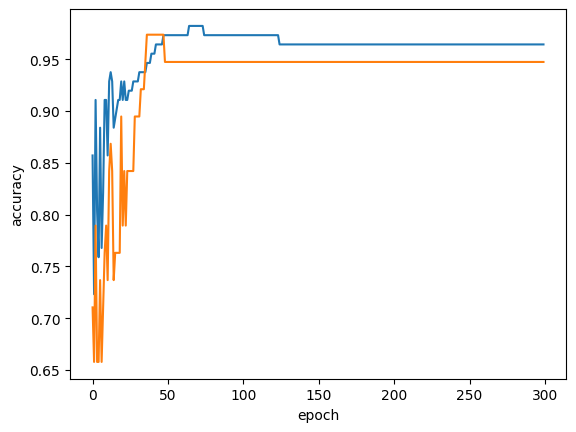

In [14]:
import matplotlib.pyplot as plt

plt.plot(train_score)
plt.plot(test_score)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

In [15]:
sc = SGDClassifier(loss='log_loss', max_iter=40, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9473684210526315


In [16]:
sc = SGDClassifier(loss='hinge', max_iter=40, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.9642857142857143
0.9210526315789473


wine

In [18]:
redwine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-red.csv', sep=';')
redwine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
whitewine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/winequality-white.csv', sep=';')
whitewine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [20]:
red_input = redwine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol', 'quality']].to_numpy()
red_target = np.zeros(len(redwine))
white_input = whitewine[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'free sulfur dioxide', 'total sulfur dioxide',
                      'density', 'pH', 'sulphates', 'alcohol', 'quality']].to_numpy()
white_target = np.ones(len(whitewine))